<a href="https://colab.research.google.com/github/Raaghashree/Intel-Products-Sentiment-Analysis/blob/main/Vaders_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install necessary modules

In [1]:
pip install googletrans==4.0.0-rc1 langdetect

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=101238f9603145c578f2cfce09fec0c7085aee21e89865f7534be82823f95a0d
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
  Cre

Upload files to anaylse

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Intel 14th gen data.csv to Intel 14th gen data.csv


**Import modules and download packages**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from langdetect import detect
from googletrans import Translator
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Choose file to perform analysis on:

In [20]:
#Replace with different file name if required
df = pd.read_csv("Intel 14th gen data.csv")

VADERS SENTIMENT ANALYSER

In [21]:
sia = SentimentIntensityAnalyzer()
translator = Translator()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
stop_words.update(['cpu','good','processor','intel','chip','core','i9','gen','run','pc','used','return','arrived','box','new','amazon','issue','day',"don't",'open','great','open','core','got','im','fine','like','didnt','tried','despite','month','case','high'])


Preprocessing Data

In [23]:
print("Size of data:")
print("Before preprocessing:",df.shape)

def preprocessing(df):

    df.drop_duplicates(subset='reviewId', keep='first', inplace=True)
    df['reviewDescription'].fillna('', inplace=True)
    df['reviewDescription'] = df['reviewDescription'].astype(str).str.lower()

    def clean_text(text):
        text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
        words = nltk.word_tokenize(text)
        words = [word for word in words if word.isalpha()]  # Remove non-alphabetic tokens
        words = [word for word in words if word not in stop_words]  # Remove stop words
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
        return ' '.join(lemmatized_words)

    df['reviewDescription'] = df['reviewDescription'].apply(clean_text)
    return df

df = preprocessing(df)
print("After preprocessing:",df.shape)

Size of data:
Before preprocessing: (349, 7)
After preprocessing: (349, 7)


Analysing Sentiment

In [24]:

def detect_and_translate(text):
    try:
        lang = detect(text)
    except:
        lang = 'unknown'

    if lang != 'en':
        try:
            text = translator.translate(text, src=lang, dest='en').text
        except:
            text = ''

    return text

def analyze_sentiment(df):
    res = {}
    positive_comments = []
    negative_comments = []

    for i, row in tqdm(df.iterrows(), total=len(df)):
        text = str(row['reviewDescription'])
        text = detect_and_translate(text)

        scores = sia.polarity_scores(text)
        myid = row['Id']
        res[myid] = scores

        if scores['compound'] >= 0.05:
            positive_comments.append(text)
        elif scores['compound'] <= -0.05:
            negative_comments.append(text)

    return res, positive_comments, negative_comments


res, positive_comments, negative_comments = analyze_sentiment(df)


  0%|          | 0/349 [00:00<?, ?it/s]

User Sentiments:

In [25]:
print(f"Number of positive comments: {len(positive_comments)}")
print(f"Number of negative comments: {len(negative_comments)}")

Number of positive comments: 210
Number of negative comments: 73


Analysed sentiments for the reviews

In [26]:
for myid, scores in res.items():
    print(f"Review ID: {myid}, Sentiment Scores: {scores}")


Review ID: 1, Sentiment Scores: {'neg': 0.188, 'neu': 0.67, 'pos': 0.143, 'compound': 0.0}
Review ID: 2, Sentiment Scores: {'neg': 0.025, 'neu': 0.682, 'pos': 0.294, 'compound': 0.967}
Review ID: 3, Sentiment Scores: {'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'compound': 0.4767}
Review ID: 4, Sentiment Scores: {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.8442}
Review ID: 5, Sentiment Scores: {'neg': 0.156, 'neu': 0.603, 'pos': 0.241, 'compound': 0.1779}
Review ID: 6, Sentiment Scores: {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.3182}
Review ID: 7, Sentiment Scores: {'neg': 0.0, 'neu': 0.354, 'pos': 0.646, 'compound': 0.9274}
Review ID: 8, Sentiment Scores: {'neg': 0.0, 'neu': 0.424, 'pos': 0.576, 'compound': 0.7003}
Review ID: 9, Sentiment Scores: {'neg': 0.045, 'neu': 0.594, 'pos': 0.361, 'compound': 0.8953}
Review ID: 10, Sentiment Scores: {'neg': 0.166, 'neu': 0.665, 'pos': 0.169, 'compound': 0.2751}
Review ID: 11, Sentiment Scores: {'neg': 0.0, 'neu': 0.721, 'pos

The updated dataframe

In [27]:
scores_df = pd.DataFrame.from_dict(res, orient='index')
scores_df.index.name = 'Review ID'

vaders = df.merge(scores_df, left_on='Id', right_index=True)
vaders.head()

,Id,reviewId,country,ratingScore,productAsin,reviewTitle,reviewDescription,neg,neu,pos,compound
0,1,R35XAKHE60A83L,United States,5,B0CQ1M1YXM,Snappy CPU Such Value for-<$250.00,uhd graphic low profile low heat tdp paired ar...,0.188,0.670,0.143,0.0000
1,2,R3ATB0W5WSXIEZ,India,5,B0CGJDKLB8,i9 14th gen is the beast!,upgraded super happy performance able achieve ...,0.025,0.682,0.294,0.9670
2,3,R3CC79PFLSC7R3,India,5,B0CGJDKLB8,Beast gaming 💪🐻,beast gaming world powerful set processer rtx ...,0.000,0.728,0.272,0.4767
3,4,R2XLUOMZDZXEH2,Mexico,5,B0CGJDKLB8,Excelente procesador y envío rápido,todo vino en orden perfectamente empacado comp...,0.000,0.633,0.367,0.8442
4,5,R15Z5SQ4FHA4VL,Mexico,5,B0CGJDKLB8,Una maravilla de procesador,el tope de gama en su momento igual que el ven...,0.156,0.603,0.241,0.1779


Extracting Features

In [28]:
def extract_features(comments, n_features=10):

    vectorizer = TfidfVectorizer(max_features=n_features, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(comments)
    feature_names = vectorizer.get_feature_names_out()
    sums = tfidf_matrix.sum(axis=0)
    data = [(feature_names[col], sums[0, col]) for col in range(sums.shape[1])]
    ranking = pd.DataFrame(data, columns=['feature', 'tfidf']).sort_values(by='tfidf', ascending=False)

    return ranking

positive_features = extract_features(positive_comments)
negative_features = extract_features(negative_comments)

Results of feature analysis and overall product sentiment:

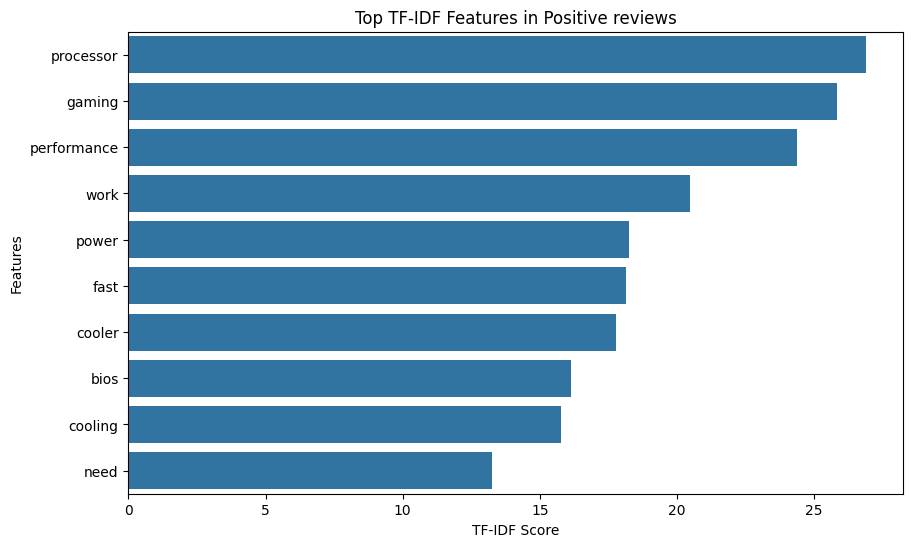

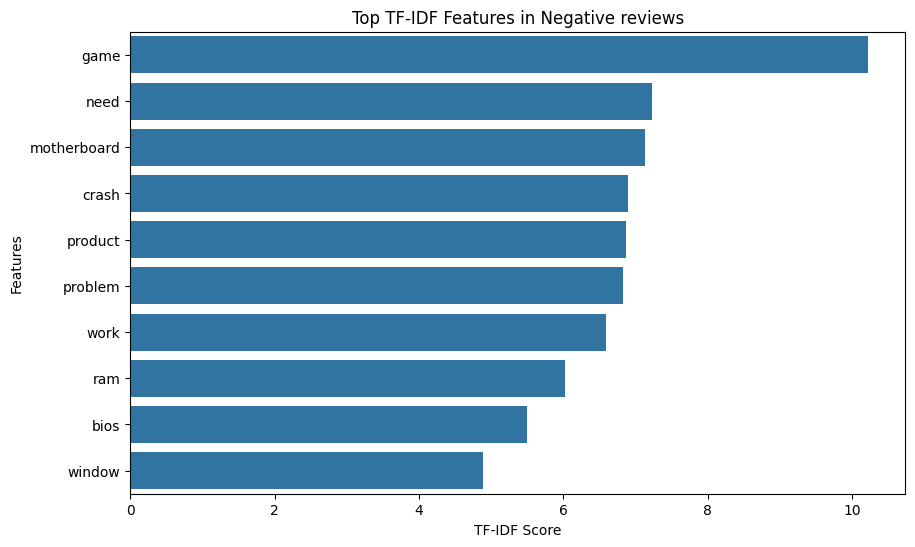

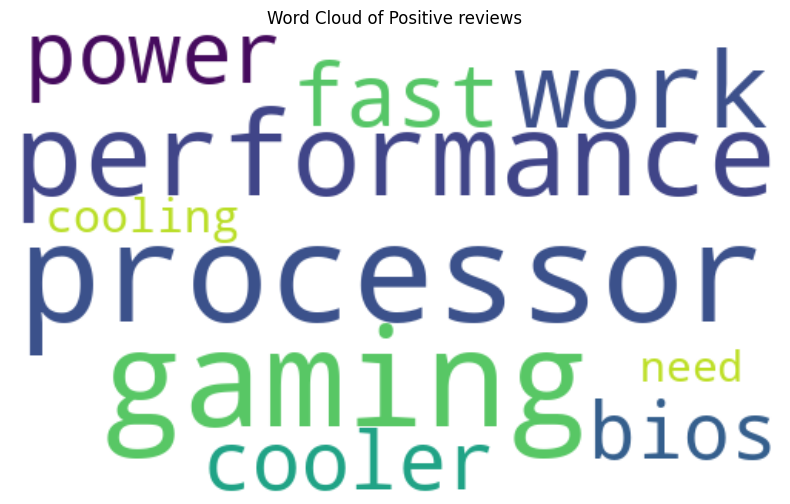

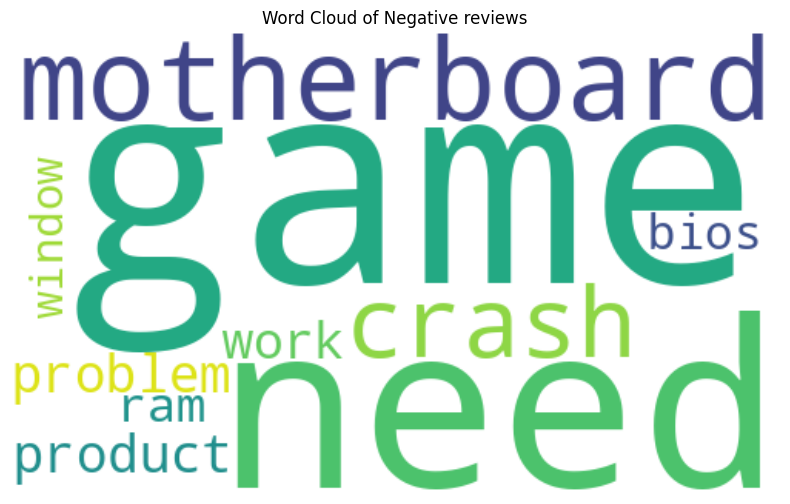

In [29]:
#TF-IDF features positive reviews
plt.figure(figsize=(10, 6))
sns.barplot(x='tfidf', y='feature', data=positive_features)
plt.title('Top TF-IDF Features in Positive reviews')
plt.xlabel('TF-IDF Score')
plt.ylabel('Features')
plt.show()

print("\n" * 3)

#TF-IDF features negative reviews
plt.figure(figsize=(10, 6))
sns.barplot(x='tfidf', y='feature', data=negative_features)
plt.title('Top TF-IDF Features in Negative reviews')
plt.xlabel('TF-IDF Score')
plt.ylabel('Features')
plt.show()

print("\n" * 3)

# Word Cloud Positive reviews
plt.figure(figsize=(10, 6))
wordcloud_pos = WordCloud(width=500, height=300, background_color='white').generate_from_frequencies(dict(positive_features.values))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive reviews')
plt.show()

print("\n" * 3)

# Word Cloud Negative reviews
plt.figure(figsize=(10, 6))
wordcloud_neg = WordCloud(width=500, height=300, background_color='white').generate_from_frequencies(dict(negative_features.values))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative reviews')
plt.show()


Overall sentiment of reviews

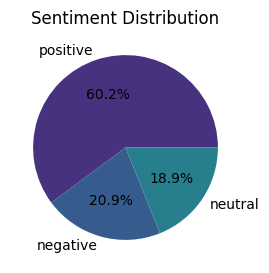

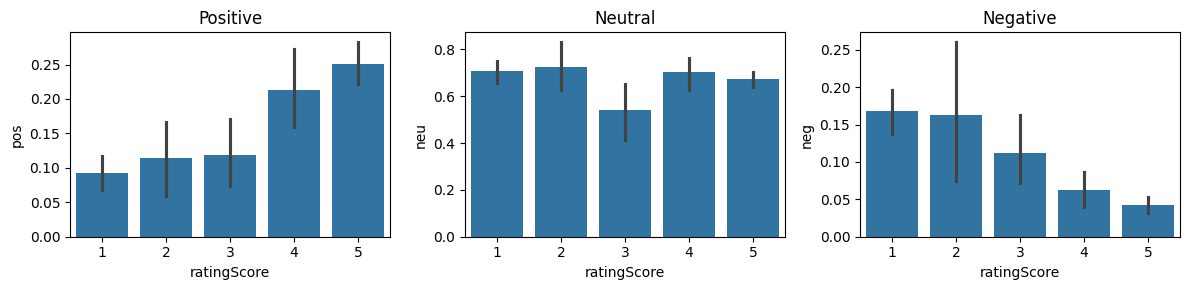

In [30]:
sentiment_counts = vaders['compound'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x <= -0.05 else 'neutral')
sentiment_distribution = sentiment_counts.value_counts()
plt.figure(figsize=(4, 3))
plt.pie(sentiment_distribution.values, labels=sentiment_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Sentiment Distribution')
plt.show()

print("\n\n")

fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='ratingScore', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='ratingScore', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='ratingScore', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()

plt.show()